<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/predictModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 특정주식의 과거 데이터를 기반으로 향후 주가예측

In [6]:
!pip install yfinance
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

# 데이터 수집
start_date = "2015-01-01"
end_date = "2023-12-31"
stock_data = yf.download('CAMT', start=start_date, end=end_date)
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2015-01-02  3.03  3.11  2.97   3.04   2.756082   62200
2015-01-05  3.03  3.03  2.94   2.94   2.665421  111500
2015-01-06  3.02  3.05  2.98   3.02   2.737950   70000
2015-01-07  3.03  3.17  3.03   3.13   2.837676   97900
2015-01-08  3.18  3.18  3.05   3.11   2.819544   48400


### 데이터 전처리

In [3]:
# 필요한 열 선택 및 결측값 처리
data = stock_data[['Close']]
data = data.dropna()

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 훈련 및 테스트 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM 입력 데이터 형식으로 변환
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 데이터 차원 조정 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


### 모델훈련

In [4]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train, y_train, batch_size=1, epochs=1)


1750/1750 [==============================] - 56s 29ms/step - loss: 0.0010


13/13 [==============================] - 0s 25ms/step


ValueError: x and y must have same first dimension, but have shapes (1751,) and (1750, 1)

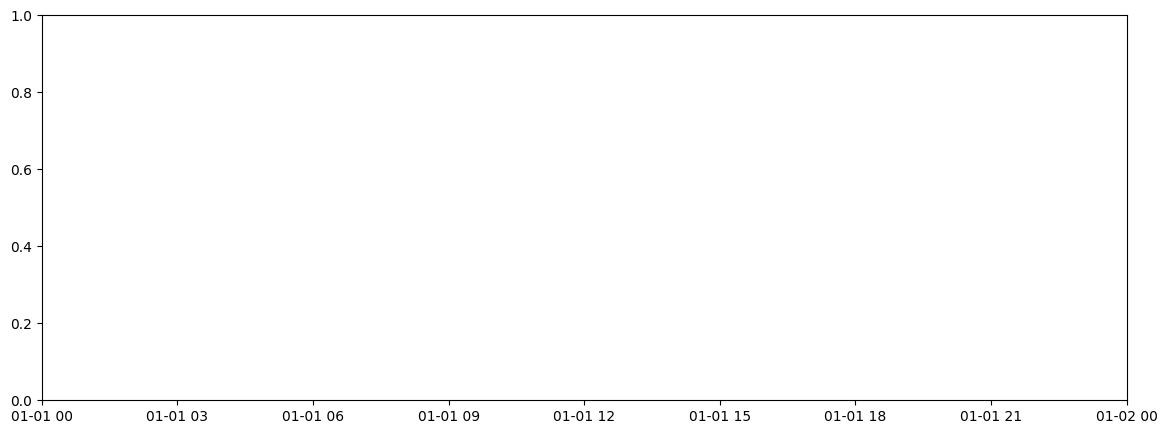

In [7]:
# 예측 수행
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값 역정규화
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# 실제값과 예측값 비교
plt.figure(figsize=(14, 5))
plt.plot(data.index[time_step:train_size], train_predict, color='blue', label='Training Prediction')
plt.plot(data.index[train_size+time_step:], test_predict, color='red', label='Test Prediction')
plt.plot(data.index, data['Close'], color='green', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2015-01-02  3.03  3.11  2.97   3.04   2.756082   62200
2015-01-05  3.03  3.03  2.94   2.94   2.665421  111500
2015-01-06  3.02  3.05  2.98   3.02   2.737950   70000
2015-01-07  3.03  3.17  3.03   3.13   2.837676   97900
2015-01-08  3.18  3.18  3.05   3.11   2.819544   48400
13/13 [==============================] - 0s 16ms/step


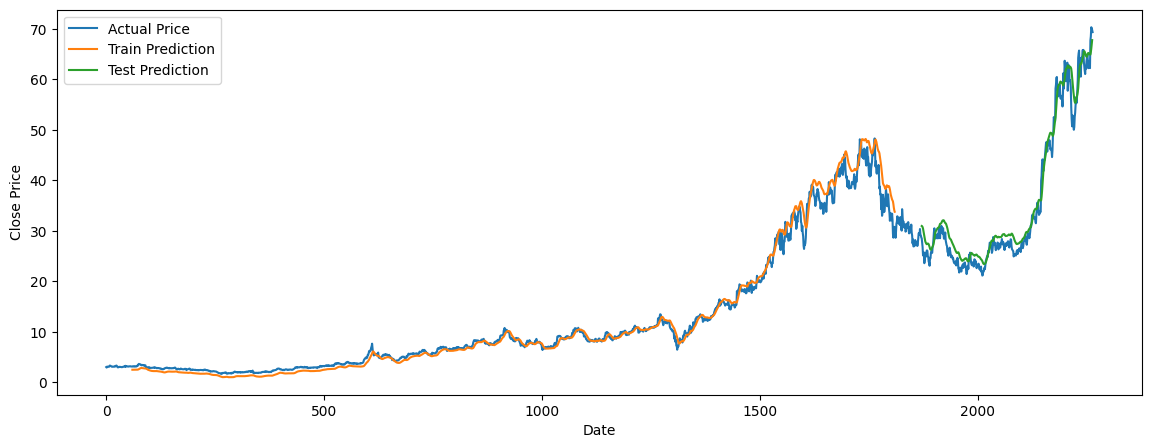

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

# 데이터 수집
start_date = "2015-01-01"
end_date = "2023-12-31"
stock_data = yf.download('CAMT', start=start_date, end=end_date)
print(stock_data.head())

# 필요한 열 선택 및 결측값 처리
data = stock_data[['Close']]
data = data.dropna()

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 훈련 및 테스트 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM 입력 데이터 형식으로 변환
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 데이터 차원 조정 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train, y_train, batch_size=1, epochs=1)

# 예측 수행
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값 역정규화
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# 예측 결과 시각화
plt.figure(figsize=(14, 5))

# 훈련 데이터 예측
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# 테스트 데이터 예측
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# 실제 데이터와 예측 데이터 시각화
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

# 데이터 수집
start_date = "2015-01-01"
end_date = "2023-12-31"
stock_data = yf.download('CAMT', start=start_date, end=end_date)

# 필요한 열 선택 및 결측값 처리
data = stock_data[['Close']]
data = data.dropna()

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 훈련 및 테스트 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM 입력 데이터 형식으로 변환
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 데이터 차원 조정 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train, y_train, batch_size=1, epochs=1)

# 예측 수행
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값 역정규화
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# 실제 데이터와 예측 데이터의 날짜 범위 설정
train_dates = data.index[time_step:len(train_predict) + time_step]
test_dates = data.index[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1]

# 실제 데이터와 예측 데이터를 데이터프레임으로 결합
train_df = pd.DataFrame({
    'Date': train_dates,
    'Actual': data['Close'][time_step:len(train_predict) + time_step].values,
    'Prediction': train_predict.flatten()
})

test_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': data['Close'][len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1].values,
    'Prediction': test_predict.flatten()
})

# 데이터프레임 출력
print("Train Data Predictions")
print(train_df.head())

print("\nTest Data Predictions")
print(test_df.head())


[*********************100%%**********************]  1 of 1 completed


13/13 [==============================] - 0s 15ms/step
Train Data Predictions
        Date  Actual  Prediction
0 2015-03-31    3.19    3.970274
1 2015-04-01    3.15    3.970513
2 2015-04-02    3.18    3.968344
3 2015-04-06    3.21    3.968872
4 2015-04-07    3.15    3.974313

Test Data Predictions
        Date     Actual  Prediction
0 2022-06-08  28.540001   31.580471
1 2022-06-09  27.680000   31.505617
2 2022-06-10  26.790001   31.297649
3 2022-06-13  25.139999   30.941767
4 2022-06-14  25.129999   30.354303


In [10]:
# 최근 60일의 데이터 준비
last_60_days = scaled_data[-time_step:]
X_future = last_60_days.reshape(1, time_step, 1)

# 2024년 1월 주가 예측
predicted_price_scaled = model.predict(X_future)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted closing price for January 2024: {predicted_price[0][0]}")


1/1 [==============================] - 0s 46ms/step
Predicted closing price for January 2024: 69.12483215332031


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 데이터 수집
start_date = "2015-01-01"
end_date = "2024-05-31"
stock_data = yf.download('CAMT', start=start_date, end=end_date)

# 필요한 열 선택 및 결측값 처리
data = stock_data[['Close']]
data = data.dropna()

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# LSTM 입력 데이터 형식으로 변환
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_data, y_data = create_dataset(scaled_data, time_step)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_data, y_data, batch_size=1, epochs=10)

# 최근 60일의 데이터 준비
last_60_days = scaled_data[-time_step:]
X_future = last_60_days.reshape(1, time_step, 1)

# 2024년 6월 주가 예측
predicted_price_scaled = model.predict(X_future)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted closing price for June 2024: {predicted_price[0][0]}")


[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
2308/2308 [==============================] - 78s 32ms/step - loss: 9.6922e-04
Epoch 2/10
2308/2308 [==============================] - 72s 31ms/step - loss: 4.7170e-04
Epoch 3/10
2308/2308 [==============================] - 72s 31ms/step - loss: 4.8587e-04
Epoch 4/10
2308/2308 [==============================] - 72s 31ms/step - loss: 2.8100e-04
Epoch 5/10
2308/2308 [==============================] - 72s 31ms/step - loss: 2.3837e-04
Epoch 6/10
2308/2308 [==============================] - 71s 31ms/step - loss: 2.6058e-04
Epoch 7/10
2308/2308 [==============================] - 71s 31ms/step - loss: 2.1699e-04
Epoch 8/10
2308/2308 [==============================] - 71s 31ms/step - loss: 2.7391e-04
Epoch 9/10
2308/2308 [==============================] - 72s 31ms/step - loss: 2.2561e-04
Epoch 10/10
1/1 [==============================] - 1s 1s/step
Predicted closing price for June 2024: 106.49854278564453


In [12]:
# 최근 60일의 데이터 준비
last_60_days = scaled_data[-time_step:]
X_future = last_60_days.reshape(1, time_step, 1)

# 일주일 단위 예측
predicted_prices = []
for i in range(7):
    predicted_price_scaled = model.predict(X_future)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices.append(predicted_price[0][0])

    # 예측된 값을 사용하여 입력 데이터 업데이트
    new_input = np.append(last_60_days[1:], predicted_price_scaled)
    last_60_days = new_input.reshape(time_step, 1)
    X_future = last_60_days.reshape(1, time_step, 1)

print(f"Predicted prices for the next week: {predicted_prices}")


1/1 [==============================] - 0s 26ms/step
Predicted prices for the next week: [106.49854, 107.17948, 107.97864, 108.83035, 109.690414, 110.53061, 111.335495]


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data[['Close']]

def preprocess_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    def create_dataset(dataset):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_step):
            a = dataset[i:(i + time_step), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

    X_data, y_data = create_dataset(scaled_data)
    X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)
    return X_data, y_data, scaler

def build_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def predict_next_week(model, scaler, data, time_step=60):
    last_60_days = data[-time_step:]
    X_future = last_60_days.reshape(1, time_step, 1)

    predicted_prices = []
    for _ in range(7):  # 예측할 일 수
        predicted_price_scaled = model.predict(X_future)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)
        predicted_prices.append(predicted_price[0][0])

        new_input = np.append(last_60_days[1:], predicted_price_scaled)
        last_60_days = new_input.reshape(time_step, 1)
        X_future = last_60_days.reshape(1, time_step, 1)

    return predicted_prices

# 데이터 수집 및 전처리
data = fetch_data('CAMT', '2015-01-01', '2024-06-21')
X_data, y_data, scaler = preprocess_data(data)

# 모델 생성 및 훈련
model = build_model()
model.fit(X_data, y_data, batch_size=1, epochs=10)

# 주가 예측
predicted_prices = predict_next_week(model, scaler, scaler.transform(data))

print(f"Predicted prices for the last week of June 2024: {predicted_prices}")


[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
2322/2322 [==============================] - 75s 31ms/step - loss: 8.2385e-04
Epoch 2/10
2322/2322 [==============================] - 73s 31ms/step - loss: 4.8297e-04
Epoch 3/10
2322/2322 [==============================] - 73s 31ms/step - loss: 2.4765e-04
Epoch 4/10
2322/2322 [==============================] - 72s 31ms/step - loss: 2.5858e-04
Epoch 5/10
2322/2322 [==============================] - 72s 31ms/step - loss: 2.1812e-04
Epoch 6/10
2322/2322 [==============================] - 72s 31ms/step - loss: 2.4997e-04
Epoch 7/10
2322/2322 [==============================] - 73s 31ms/step - loss: 2.2147e-04
Epoch 8/10
2322/2322 [==============================] - 73s 32ms/step - loss: 1.8248e-04
Epoch 9/10
2322/2322 [==============================] - 73s 31ms/step - loss: 2.1134e-04
Epoch 10/10
1/1 [==============================] - 0s 26ms/step
Predicted prices for the last week of June 2024: [112.63329, 110.01085, 107.73022, 105.56728, 103.49321, 101.50518, 99.598206]


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas_datareader.data as web

# 데이터 수집
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def fetch_economic_data(symbol, start_date, end_date):
    econ_data = web.DataReader(symbol, 'fred', start_date, end_date)
    return econ_data

# 기술적 지표 계산
def calculate_technical_indicators(data):
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['RSI'] = data['Close'].diff().apply(lambda x: np.log(1 + x))
    data['RSI'] = data['RSI'].rolling(window=14).mean()
    data = data.dropna()
    return data

# 데이터 전처리
def preprocess_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    def create_dataset(dataset):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_step):
            a = dataset[i:(i + time_step)]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

    X_data, y_data = create_dataset(scaled_data)
    X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], data.shape[1])
    return X_data, y_data, scaler

# 모델 생성
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 데이터 수집
sp500_data = fetch_data('^GSPC', '2015-01-01', '2024-06-30')
treasury_yield = fetch_economic_data('DGS10', '2015-01-01', '2024-06-30')
vix = fetch_economic_data('VIXCLS', '2015-01-01', '2024-06-30')

sp500_data = calculate_technical_indicators(sp500_data)

# 데이터 결합
data = sp500_data[['Close', 'Volume', 'SMA_50', 'SMA_200', 'RSI']].copy()
data['10Y_Treasury_Yield'] = treasury_yield.resample('D').ffill().reindex(data.index).ffill()
data['VIX'] = vix.resample('D').ffill().reindex(data.index).ffill()

# 데이터 전처리
X_data, y_data, scaler = preprocess_data(data)

# 모델 생성 및 훈련
model = build_model((X_data.shape[1], X_data.shape[2]))
model.fit(X_data, y_data, batch_size=1, epochs=10)

# 주가 예측 함수
def predict_next_week(model, scaler, data, time_step=60):
    last_60_days = data[-time_step:]
    X_future = last_60_days.reshape(1, time_step, data.shape[1])

    predicted_prices = []
    for _ in range(7):  # 예측할 일 수
        predicted_price_scaled = model.predict(X_future)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)
        predicted_prices.append(predicted_price[0][0])

        new_input = np.append(last_60_days[1:], predicted_price_scaled, axis=0)
        last_60_days = new_input
        X_future = last_60_days.reshape(1, time_step, data.shape[1])

    return predicted_prices

# 주가 예측
predicted_prices = predict_next_week(model, scaler, scaler.transform(data.values))
print(f"Predicted S&P 500 prices for the last week of June 2024: {predicted_prices}")


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-21  127.120003  130.630005  124.300003  126.570000  126.570000   
2024-06-24  123.239998  124.459999  118.040001  118.110001  118.110001   
2024-06-25  121.199997  126.500000  119.320000  126.089996  126.089996   
2024-06-26  126.129997  128.119995  122.599998  126.400002  126.400002   
2024-06-27  124.000000  126.404999  122.940002  123.449997  123.449997   

               Volume  
Date                   
2024-06-21  655484700  
2024-06-24  476060900  
2024-06-25  425787500  
2024-06-26  355159700  
2024-06-27  120499118  


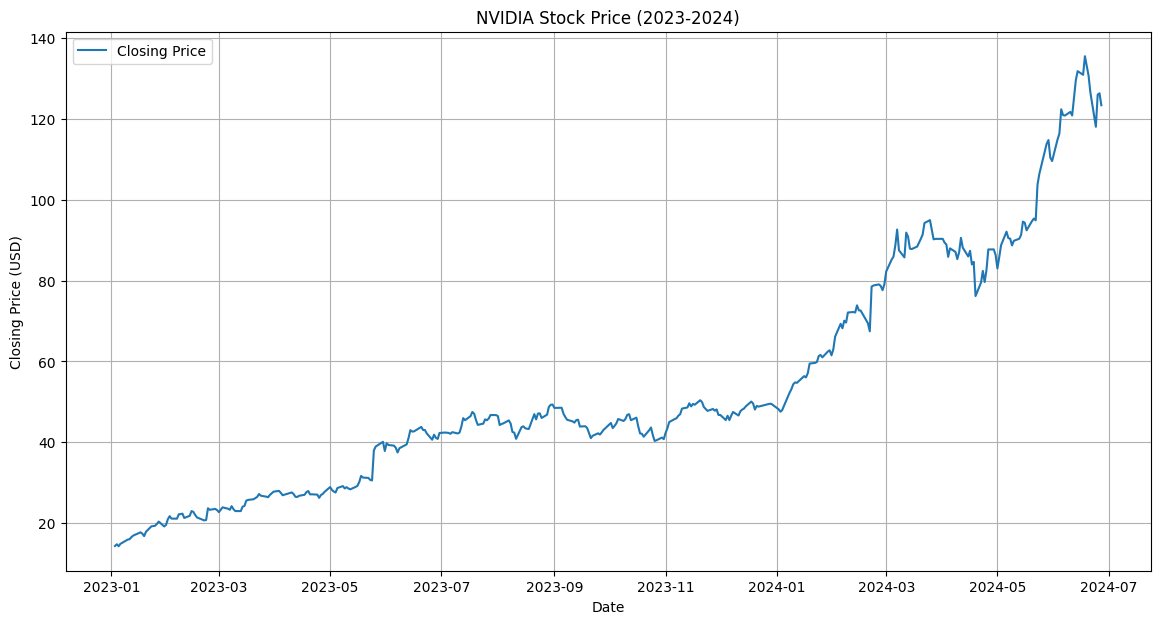

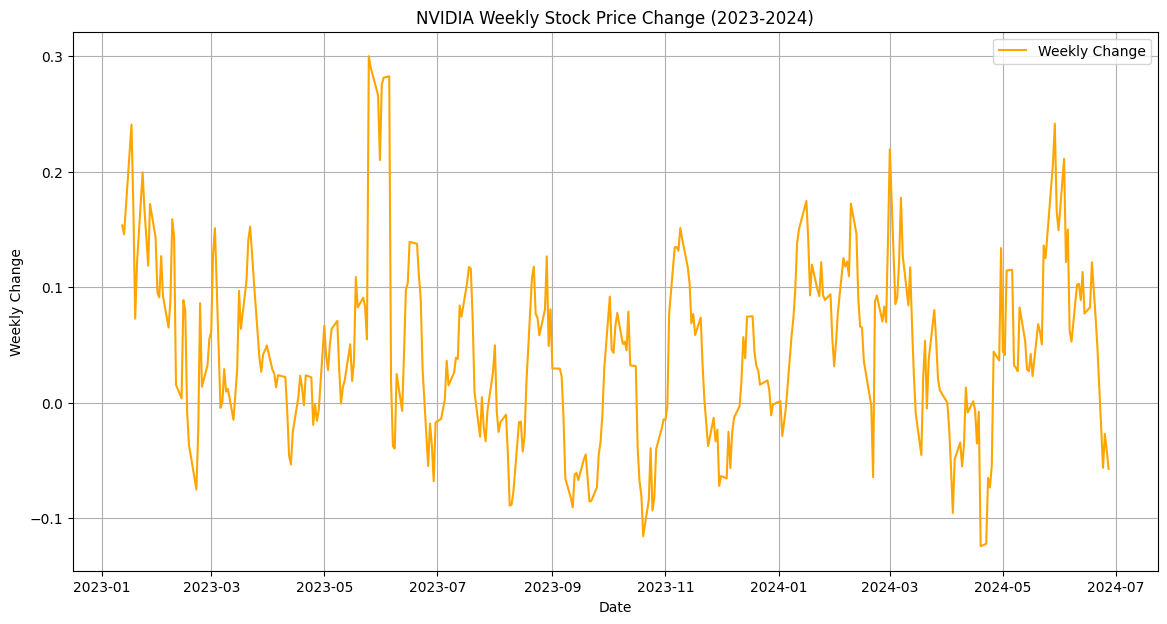

             Open        High         Low       Close   Adj Close  \
count  123.000000  123.000000  123.000000  123.000000  123.000000   
mean    86.630244   88.238675   84.868504   86.721512   86.714340   
std     21.406529   21.818061   20.734459   21.288145   21.289367   
min     47.485001   48.183998   47.320000   47.569000   47.562862   
25%     72.273499   73.712498   70.730999   72.190502   72.181187   
50%     87.442001   88.830002   85.929001   87.528000   87.520813   
75%     93.674500   95.030998   91.702499   93.479000   93.471321   
max    139.800003  140.759995  130.690002  135.580002  135.580002   

             Volume  Weekly Change  
count  1.230000e+02     123.000000  
mean   4.848995e+08       0.057912  
std    1.504806e+08       0.072827  
min    1.204991e+08      -0.124530  
25%    3.896400e+08       0.005950  
50%    4.529550e+08       0.065007  
75%    5.713955e+08       0.111263  
max    1.142269e+09       0.241633  


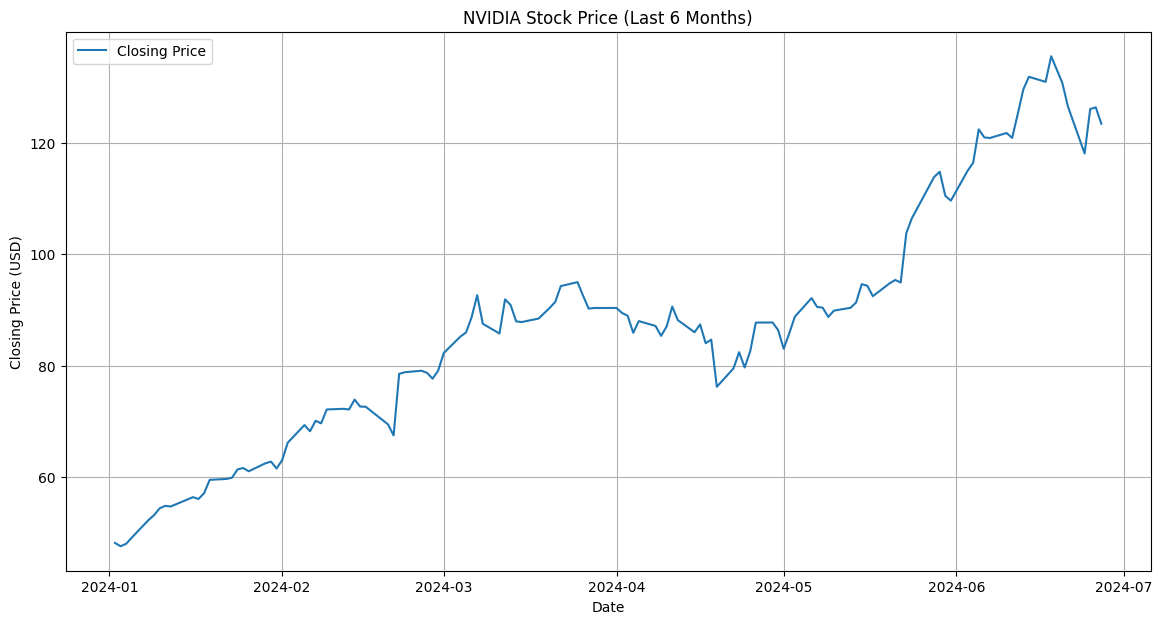

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 엔비디아 주식 데이터 다운로드
ticker = 'NVDA'
start_date = '2023-01-01'
end_date = '2024-06-30'
nvda_data = yf.download(ticker, start=start_date, end=end_date)

# 데이터 프레임 확인
print(nvda_data.tail())

# 주가 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Close'], label='Closing Price')
plt.title('NVIDIA Stock Price (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 주간 변동률 계산
nvda_data['Weekly Change'] = nvda_data['Close'].pct_change(periods=7)

# 주간 변동률 시각화
plt.figure(figsize=(14, 7))
plt.plot(nvda_data['Weekly Change'], label='Weekly Change', color='orange')
plt.title('NVIDIA Weekly Stock Price Change (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Weekly Change')
plt.legend()
plt.grid(True)
plt.show()

# 최근 6개월 데이터 분석
recent_data = nvda_data.loc['2024-01-01':]
print(recent_data.describe())

# 최근 6개월 주가 시각화
plt.figure(figsize=(14, 7))
plt.plot(recent_data['Close'], label='Closing Price')
plt.title('NVIDIA Stock Price (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
